In [9]:
import pandas as pd
import matplotlib.pyplot as plt

In [10]:

colors = ['gold', 'CornflowerBlue', 'pink', 'purple', 'PaleTurquoise', 'DarkGray']
labels = ['扬尘源', '二次硝酸盐', '二次硫酸盐', '燃煤排放源', '机动车排放源', '工业排放源']
colorsMap = dict(zip(labels,colors))

In [11]:
def contributionPicWithLegend(df):
    fonts = displayUnicode()
    ylabels = df.keys()
    sizes = df.values[0]
    labelsMap = dict(zip(ylabels, sizes))
    sizes = [labelsMap[label] for label in labels]
    # font dpi
    plt.rcParams['font.size'] = 16
    plt.rcParams['figure.dpi'] = 100

    # 白色背景
    fig1, ax1 = plt.subplots(figsize=(5, 5), facecolor='white')
    fig1.subplots_adjust(0.3, 0, 1, 1)
    # edgecolor black
    # font


    plt.pie(sizes, labels=['%.1f%%' % labelsMap[label] for label in labels],
            shadow=False, startangle=90, colors=colors,
            wedgeprops={'linewidth': 0.5, 'edgecolor': '#000000',},
            textprops=fonts['en'])

    plt.legend(
        frameon=False,
        loc='upper left',
        labels=labels,
        prop={'size': 16},
        bbox_to_anchor=(1.2, 0.7),
        # bbox_transform=fig1.transFigure,

    )

    plt.axis('equal')
    plt.show()


In [12]:
def analysisPic(df, whichleft={}):
    fonts = displayUnicode()
    # font dpi
    plt.rcParams['font.size'] = 15
    plt.rcParams['figure.dpi'] = 100
    plt.figure(figsize=(10, 15), facecolor='white')
    
    # 坐标轴 font
    
    xlabels = df[df.keys()[0]]
    picCount = len(df.keys()) - 1
    width = 0.4
    for i, ylabels in enumerate(labels):
        plt.subplot(picCount, 1, i + 1)
        # random color
        if i == picCount - 1:
            plt.bar(xlabels, height=df[ylabels], width=width,
                    color=colorsMap[ylabels], edgecolor='#000000',)
           # label 旋转 45
            plt.xticks(xlabels,rotation=60,fontproperties=fonts['en'])
            plt.ylim(0, 100)
            plt.yticks(fontproperties=fonts['en'])
        else:
            plt.bar([' '*i for i in range(len(xlabels))], height=df[ylabels],
                    width=width, color=colorsMap[ylabels], edgecolor='#000000',)
            plt.ylim(0, 100)
            plt.yticks(fontproperties=fonts['en'])
        if ylabels in whichleft:
            plt.legend((ylabels,), loc='upper left', frameon=False)
        else:
            plt.legend((ylabels,), loc='upper right', frameon=False)

    plt.show()


In [13]:
def barStackedAreaPic(df):
    plt.rcParams['font.size'] = 14
    plt.rcParams['figure.dpi'] = 300
    for i in range(1, len(df.keys())):
        df[df.keys()[i]] = df[df.keys()[i]].apply(lambda x: 0 if x < 0 else x)
    xlabels = ['全月低值时段\n(PM$_{2.5}$$\lq$≤75μg/m³)',
               '全月高值时段\n(PM$_{2.5}$>75μg/m³)']
    ylabels = df.keys()[1:7]
    lower = df[df['PM25'] <= 75].sum().drop(['PM25'])
    upper = df[df['PM25'] > 75].sum().drop(['PM25'])
    lowerPercent = lower / lower.sum() * 100
    upperPercent = upper / upper.sum() * 100
    percent = pd.DataFrame([lowerPercent, upperPercent],
                           columns=ylabels)

    width = 0.5
    for xindex, xlabel in enumerate(xlabels):
        top = 100
        for yindex, ylabel in enumerate(labels):
            bottom = top - percent[ylabel][xindex]
            plt.bar(xlabel, height=top, width=width,
                    color=colorsMap[ylabel], edgecolor='#000000')
            plt.text(2*xindex*width, (bottom + top) / 2, '%.1f%%' %
                     (percent[ylabel][xindex]), ha='center', va='center', fontdict=fonts['en'])
            top = bottom

    plt.ylim(top=100)
    plt.yticks(fontproperties=fonts['en'])
    plt.ylabel('贡献率 [%]', fontdict=fonts['zh'])
    plt.margins(0.15, 0)  # Set margins to avoid "whitespace"
    plt.legend(labels, loc=(1.01, 0.2), frameon=False)

    # Display the graph on the screen
    plt.show()


In [14]:
def displayUnicode():
    import matplotlib
    matplotlib.rcParams['axes.unicode_minus'] = False
    fontset = set([f.name for f in matplotlib.font_manager.fontManager.ttflist])
    if 'Microsoft YaHei' in fontset:
        matplotlib.rcParams['font.sans-serif'] = ['Microsoft YaHei']
    else:
        matplotlib.rcParams['font.sans-serif'] = ['Arial Unicode MS']

    return {
        'zh':{
            'family': ['Microsoft YaHei' if 'Microsoft YaHei' in fontset else 'Arial Unicode MS'],
            'weight': 'bold',
            'size': 15,
        },
        'en':{
            'family': ['Times New Roman'],
            'weight': 'bold',
            'size': 15,
        } 
    }


In [15]:
def stackedAreaPic(df):
    import numpy as np
    fonts = displayUnicode()
    # font dpi
    plt.rcParams['font.size'] = 14
    plt.rcParams['figure.dpi'] = 300
    for i in range(1, len(df.keys())):
        df[df.keys()[i]] = df[df.keys()[i]].apply(lambda x: 0 if x < 0 else x)

    fig = plt.figure(figsize=(16, 5), facecolor='white')
    ax = fig.add_subplot(111)
    ylabels = labels
    y = np.array([df[df.keys()[i]] for i in range(1,7)])
    x = df[df.keys()[0]]

    percent = y / y.sum(axis=0).astype(float) * 100 

    ax.stackplot(x, percent,colors=colors)

    resample = x[::24]#.append(pd.Series([x[::24].iat[-1] + pd.Timedelta(days=1)] ))
    ax.set_xticks(resample, rotation=90, fontproperties=fonts['en'])
    ax.set_xticklabels(resample.apply(lambda date: date.strftime("%m/%d")).values, rotation=90,fontproperties=fonts['en'])
    plt.yticks(fontproperties=fonts['en'])
    plt.ylabel('贡献率 (%)')
    plt.margins(0, 0) # Set margins to avoid "whitespace"
    plt.legend(ylabels,ncol=len(ylabels), loc=(0, 1.01),frameon=False)

    plt.show()

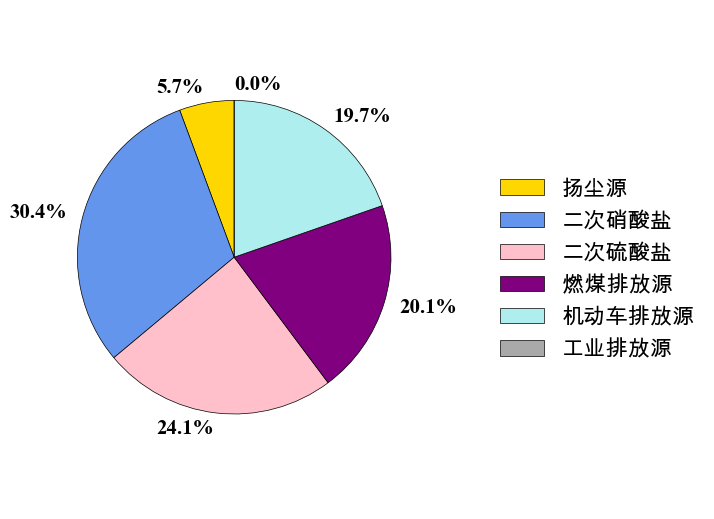

<Figure size 600x400 with 0 Axes>

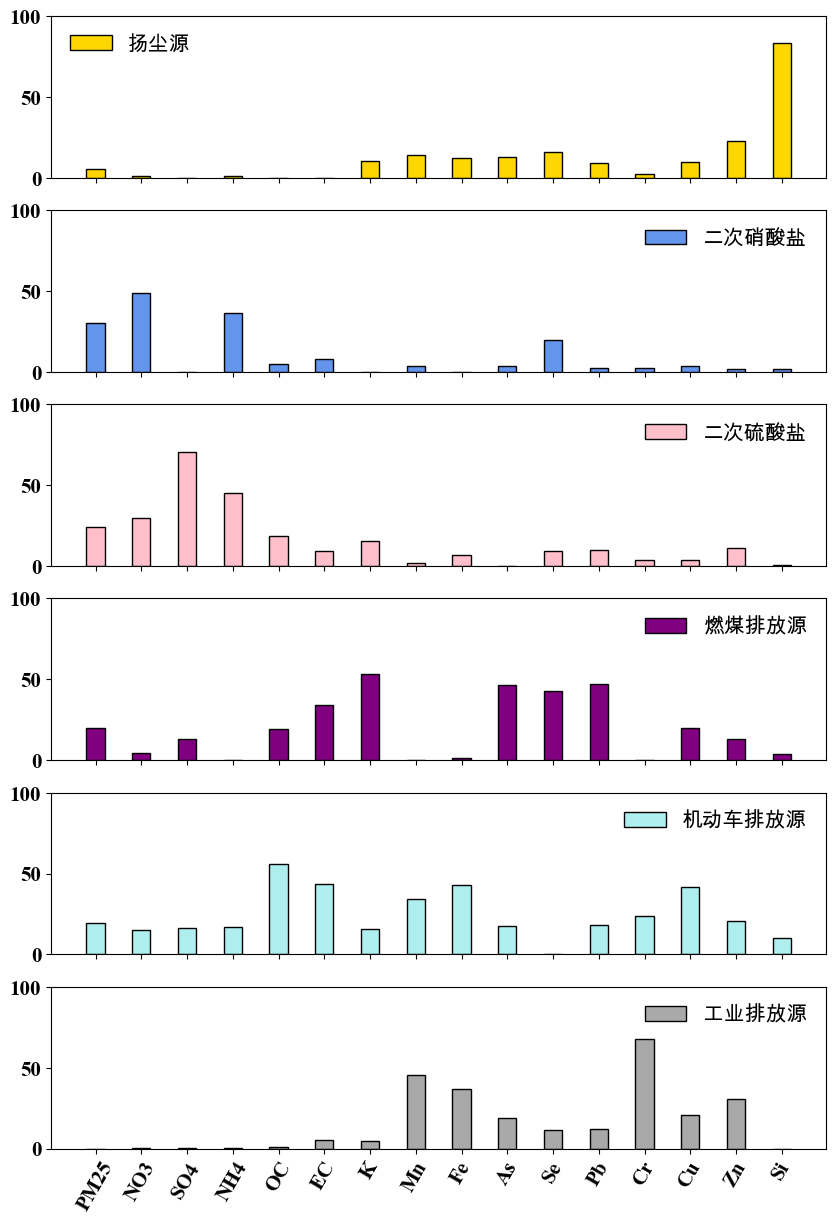

/var/folders/lz/4fpzy07s1yz6z4cpnnch7r240000gn/T/ipykernel_51209/39425806.py:16: RuntimeWarning: invalid value encountered in true_divide
  percent = y / y.sum(axis=0).astype(float) * 100


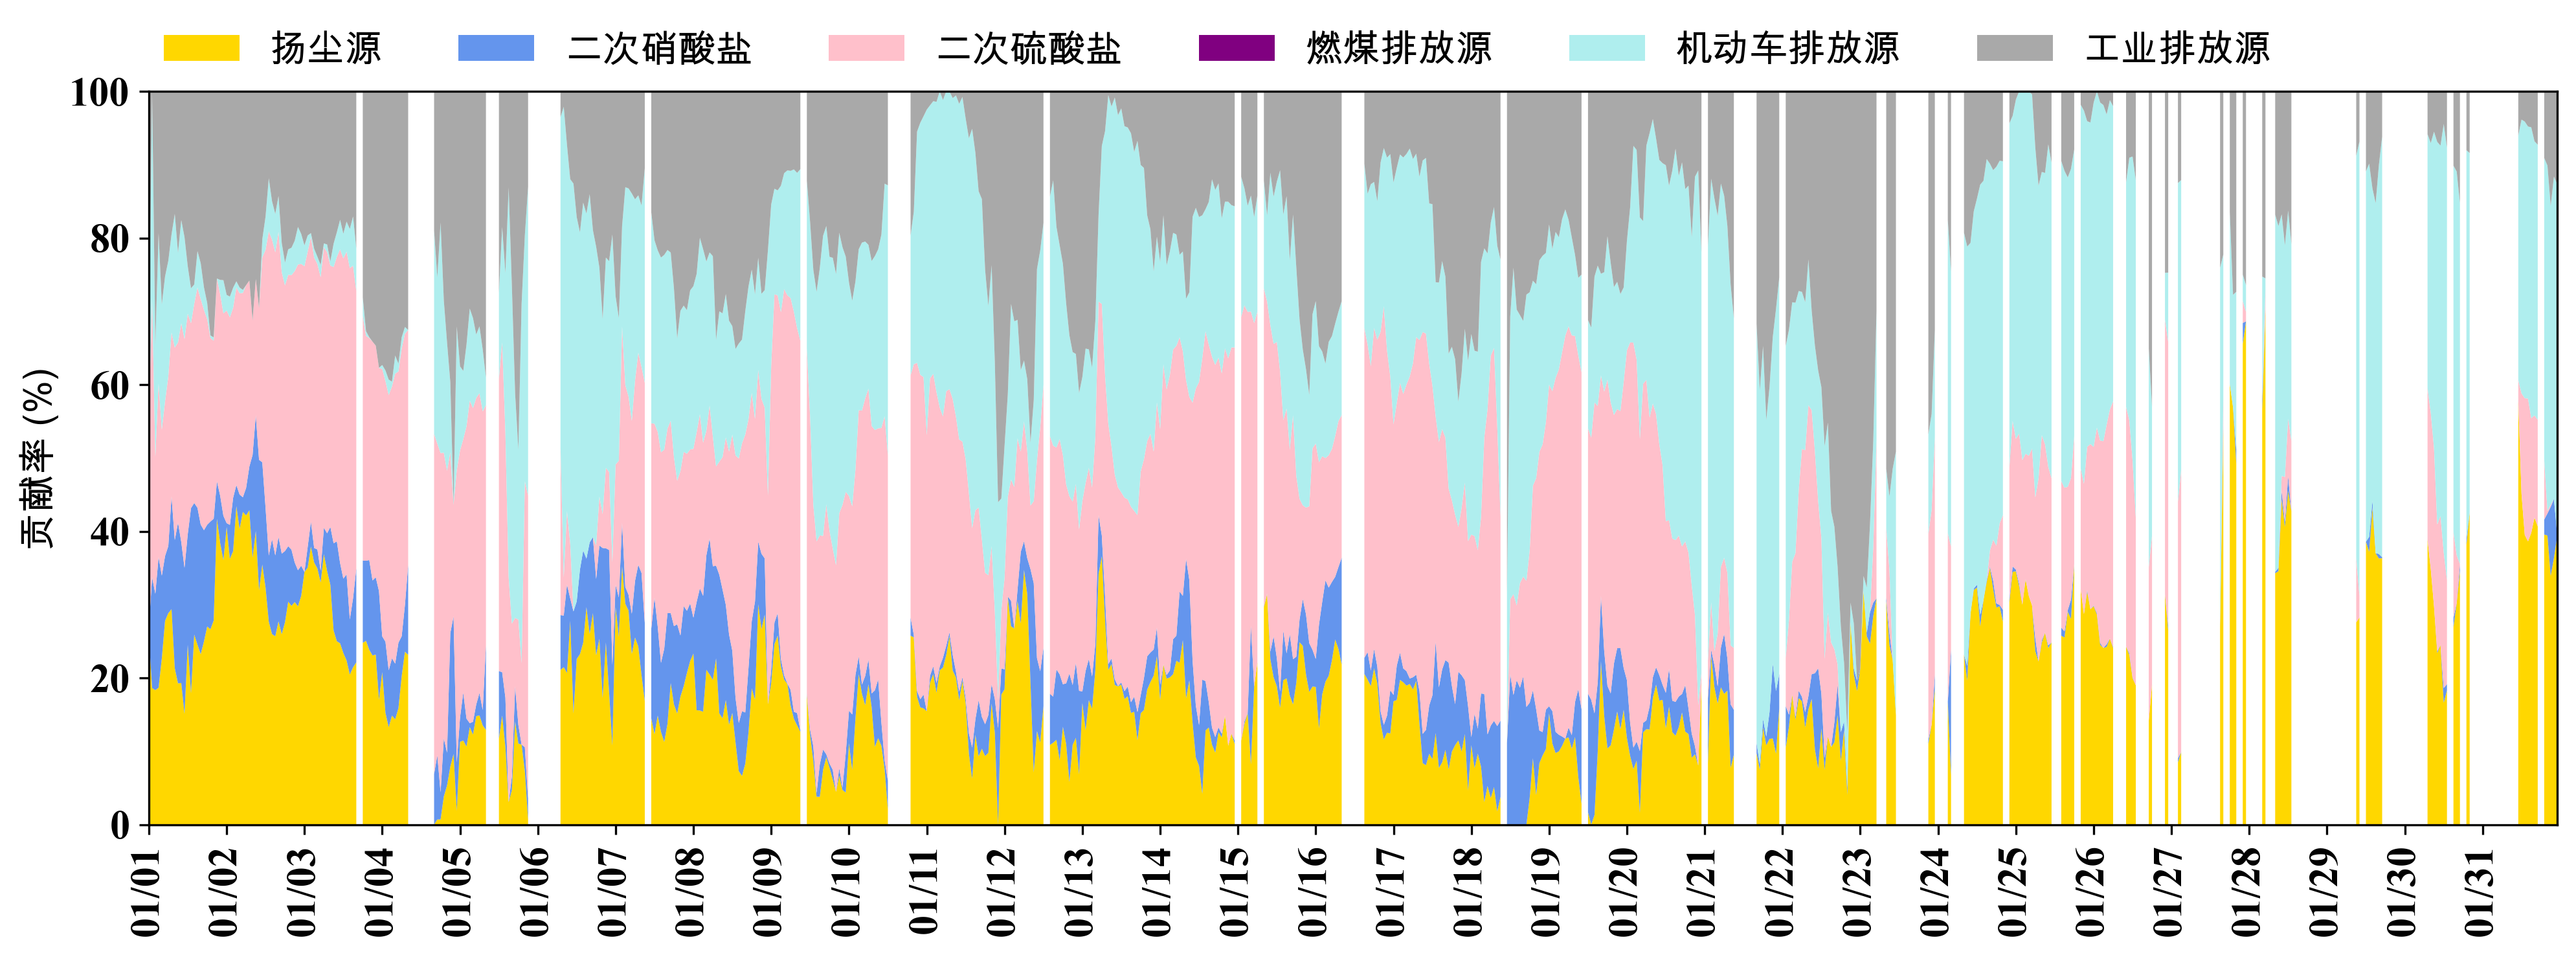

/var/folders/lz/4fpzy07s1yz6z4cpnnch7r240000gn/T/ipykernel_51209/679234202.py:9: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  lower = df[df['PM25'] <= 75].sum().drop(['PM25'])
/var/folders/lz/4fpzy07s1yz6z4cpnnch7r240000gn/T/ipykernel_51209/679234202.py:10: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  upper = df[df['PM25'] > 75].sum().drop(['PM25'])


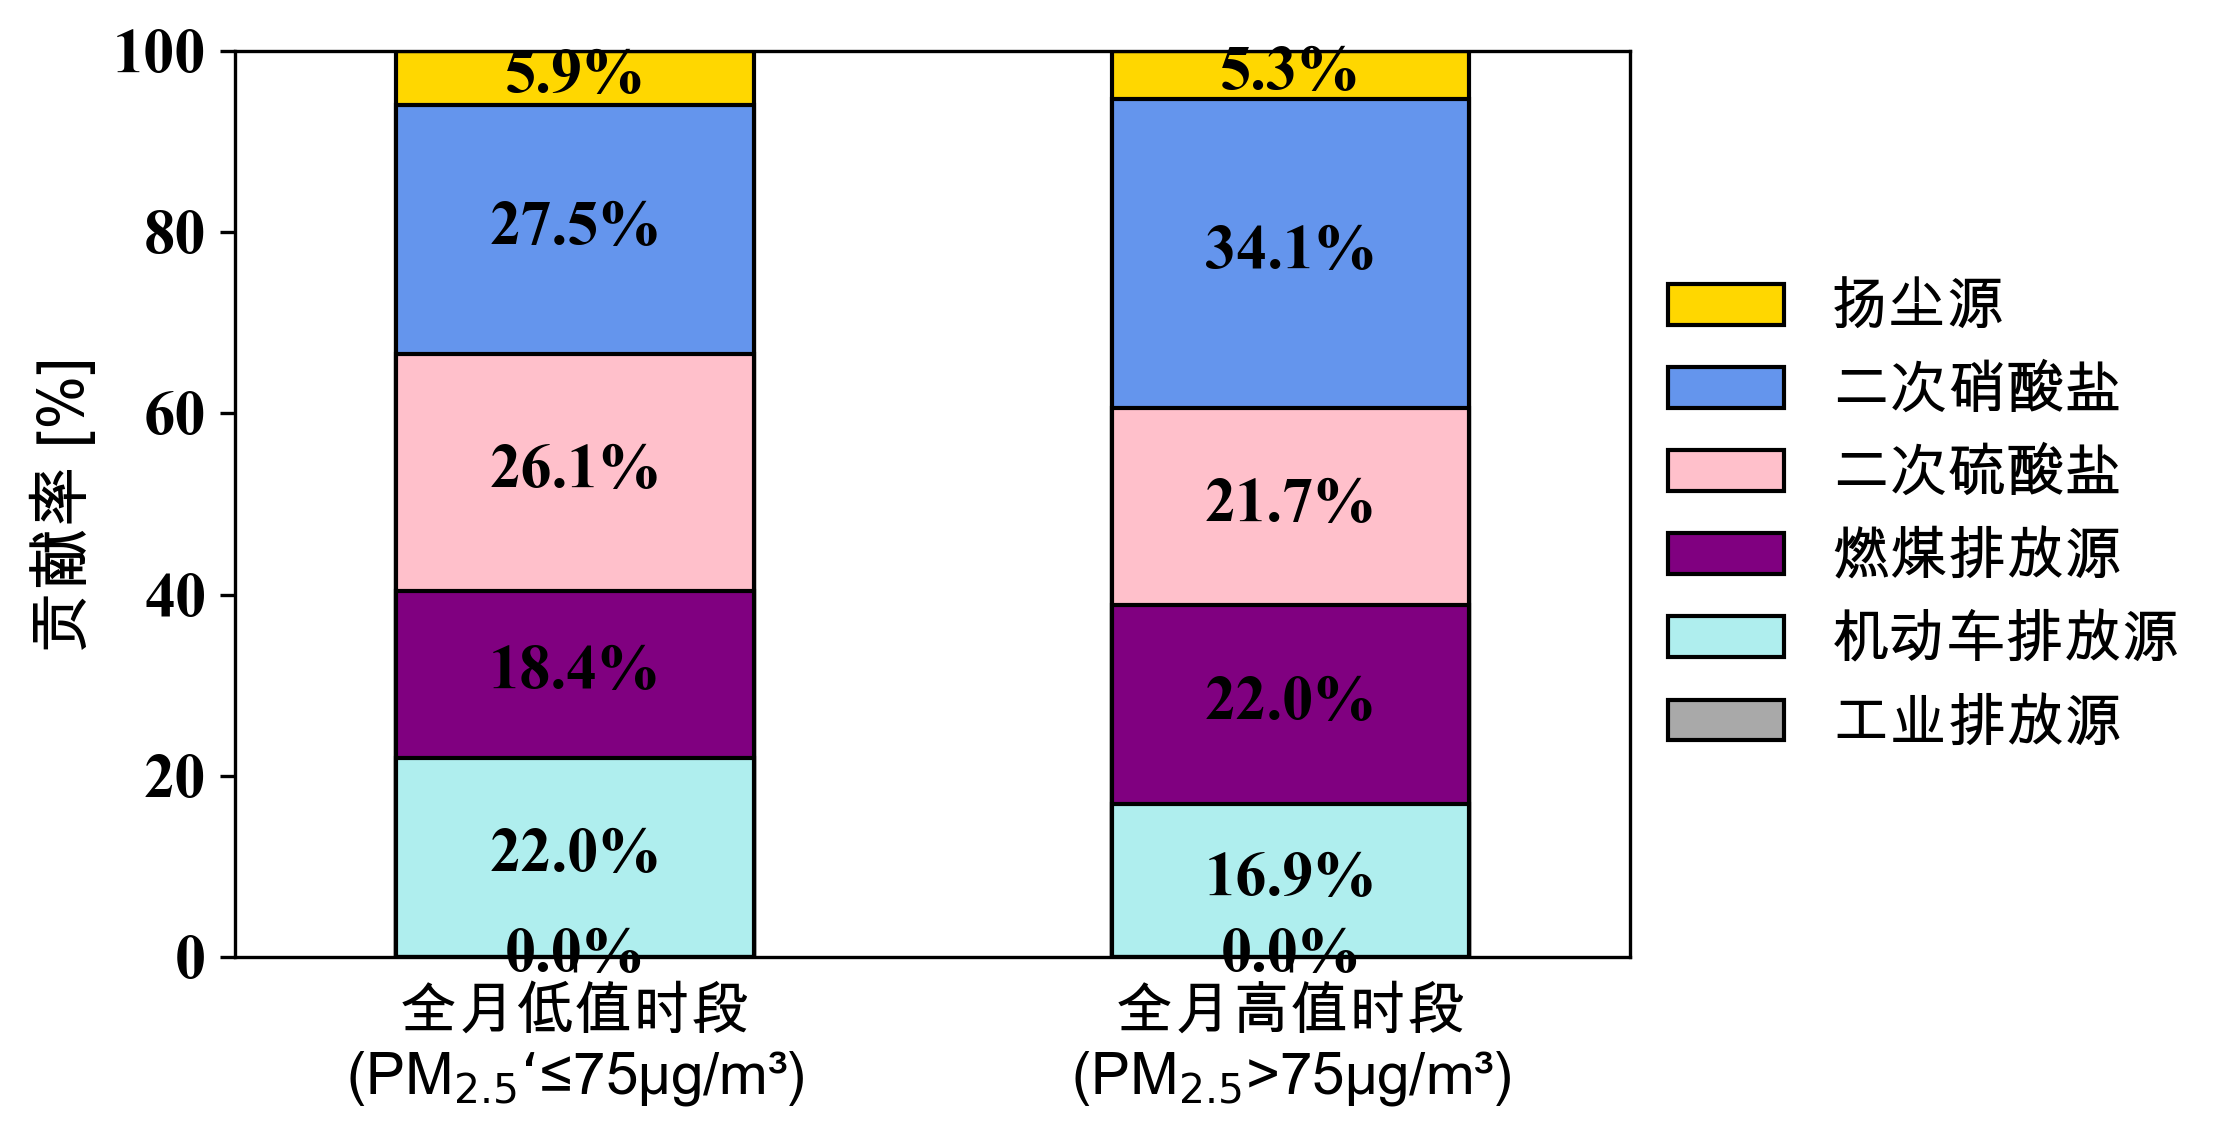

In [16]:
fonts = displayUnicode()
df = pd.read_excel('./out_base.xlsx', sheet_name="贡献图")
contributionPicWithLegend(df,)


df = pd.read_excel('./out_base.xlsx', sheet_name="识别图")
analysisPic(df,whichleft={'扬尘源'})


df = pd.read_excel('./out_base.xlsx', sheet_name="堆积图")
stackedAreaPic(df)

df = pd.read_excel('./out_base.xlsx', sheet_name="条型堆积图")
barStackedAreaPic(df)